# ML Foreclosure Binary Classification - 5% sample dataset
Only "resolved" outcomes - Either paid off or default 

    target = zeroBalCode (set to object dtype) 
    Binary classification sets zeroBalCode to either "0" or "1" for the 7 possible outcomes
    
    "0" = "Loan Success"
        * 01 = Prepaid or Matured
        * 06 = Repurchased
        * 16 = Reperforming Loan Sale

    "1" =  "Loan Failure" - Most likely loss of money (but not necessarily) one of below conditions:
        * 02 = Third Party Sale
        * 03 = Short Sale
        * 09 = Deed-in-Lieu,REO
        * 15 = Note Sale


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#!pip install pycaret
from imblearn.over_sampling import RandomOverSampler
from pycaret.classification import *
#from pycaret.regression import *
pd.set_option('display.max_columns', None)


# Importing the data - don't use *.ML.csv files!!!
If you have *.MLReady.csv then [click here](#MLReady)

In [8]:
df=pd.read_csv("data/FM_Acq2_Perf_FMAC2_loanAge_sample5.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,id,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origDate,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,loanAge,monMatur,mSA,zeroBalCode,deliqGood,deliqBad,deliqMax,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct
0,2008203,2008203,994088840298,B,OTHER,6.500,79000,360,2007-02-01,69.0,69.0,1.0,27.0,R,OH,447,0.0,0.0,633.0,633.0,633.0,77,283.0,15940,1.0,75,2,1.0,6.34,6.22,6.2850,0.019293,4.84,0.160,-0.280,0.2150,0.025237,-0.045016,0.034208
1,1174043,1174043,842724479742,C,"BANK OF AMERICA, N.A.",5.250,140000,360,2003-06-01,49.0,49.0,1.0,31.0,R,CA,956,0.0,0.0,673.0,673.0,673.0,15,345.0,40900,1.0,8,7,6.0,5.26,5.21,5.2300,0.009597,3.37,-0.010,-0.040,0.0200,-0.001901,-0.007678,0.003824
2,460151,460151,870246392264,R,"WITMER FUNDING, LLC",7.375,64000,180,2001-12-01,80.0,80.0,2.0,24.0,C,TX,761,0.0,0.0,615.0,591.0,603.0,60,120.0,19100,1.0,44,16,2.0,7.17,6.84,7.0650,0.048246,4.78,0.205,-0.535,0.3100,0.028591,-0.078216,0.043878
3,1633794,1633794,694595496729,C,OTHER,5.500,90000,360,2004-10-01,97.0,97.0,1.0,46.0,P,IA,525,30.0,1.0,781.0,781.0,781.0,72,288.0,0,9.0,21,50,21.0,5.82,5.64,5.7225,0.031915,4.21,-0.320,0.140,-0.2225,-0.054983,0.024823,-0.038882
4,1151647,1151647,517731724074,R,"JPMORGAN CHASE BANK, NA",5.500,210000,360,2003-06-01,64.0,64.0,2.0,34.0,C,CA,920,0.0,0.0,689.0,689.0,689.0,77,283.0,41740,1.0,73,3,1.0,5.26,5.21,5.2300,0.009597,3.37,0.240,-0.290,0.2700,0.045627,-0.055662,0.051625


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133163 entries, 0 to 133162
Data columns (total 39 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          133163 non-null  int64  
 1   Unnamed: 0.1        133163 non-null  int64  
 2   id                  133163 non-null  int64  
 3   origChannel         133163 non-null  object 
 4   sellerName          133163 non-null  object 
 5   origIntRate         133163 non-null  float64
 6   origUPB             133163 non-null  int64  
 7   origLoanTerm        133163 non-null  int64  
 8   origDate            133163 non-null  object 
 9   origLTV             133163 non-null  float64
 10  origCLTV            133163 non-null  float64
 11  numBorrowers        133163 non-null  float64
 12  origDebtIncRatio    133163 non-null  float64
 13  loanPurp            133163 non-null  object 
 14  propState           133163 non-null  object 
 15  zipCode             133163 non-nul

## Remove columns not involved in 'Foreclosure or Not' query

In [10]:
df.drop(['Unnamed: 0','Unnamed: 0.1','id','fredRate',\
         'bestCreditScore','worstCreditScore','monMatur',\
         'deliqGood','deliqBad','deliqMax',\
        'fmacRateMax','fmacRateMin','fmacRateVolatility',\
        'rateDiffAbove','rateDiffBelow','rateDiffAbovePct','rateDiffBelowPct',\
        ],1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133163 entries, 0 to 133162
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   origChannel       133163 non-null  object 
 1   sellerName        133163 non-null  object 
 2   origIntRate       133163 non-null  float64
 3   origUPB           133163 non-null  int64  
 4   origLoanTerm      133163 non-null  int64  
 5   origDate          133163 non-null  object 
 6   origLTV           133163 non-null  float64
 7   origCLTV          133163 non-null  float64
 8   numBorrowers      133163 non-null  float64
 9   origDebtIncRatio  133163 non-null  float64
 10  loanPurp          133163 non-null  object 
 11  propState         133163 non-null  object 
 12  zipCode           133163 non-null  int64  
 13  pMIperct          133163 non-null  float64
 14  mortInsType       133163 non-null  float64
 15  avgCreditScore    133163 non-null  float64
 16  loanAge           13

### Check if any columns have a null value

In [12]:
df.apply(lambda x: x.isnull().sum(), axis=0)

origChannel         0
sellerName          0
origIntRate         0
origUPB             0
origLoanTerm        0
origDate            0
origLTV             0
origCLTV            0
numBorrowers        0
origDebtIncRatio    0
loanPurp            0
propState           0
zipCode             0
pMIperct            0
mortInsType         0
avgCreditScore      0
loanAge             0
mSA                 0
zeroBalCode         0
fmacRateAvg         0
rateDiffAvg         0
rateDiffAvgPct      0
dtype: int64

## Engineer originDate into Date features

In [13]:
df['origDate'] = pd.to_datetime(df['origDate'])

In [14]:
df['origYear'] = df['origDate'].dt.year
df['origMonth'] = df['origDate'].dt.month

In [15]:
df.drop(['origDate'],1,inplace=True)

In [16]:
df[['origYear','origMonth']].head()

,origYear,origMonth
0,2007,2
1,2003,6
2,2001,12
3,2004,10
4,2003,6


# Turn zero Balance Code Into binary "0" GOOD and "1" BAD

In [17]:
df.zeroBalCode.unique()

array([ 1.,  9.,  6., 16., 15.,  3.,  2.])

In [18]:
df['zeroBalCode'] = df.zeroBalCode.replace([1,6,16],0)
df['zeroBalCode'] = df.zeroBalCode.replace([9,3,2,15],1)

In [19]:
df.zeroBalCode.unique()

array([0., 1.])

In [20]:
#Checking datatypes of individual feature
df.head()

,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,avgCreditScore,loanAge,mSA,zeroBalCode,fmacRateAvg,rateDiffAvg,rateDiffAvgPct,origYear,origMonth
0,B,OTHER,6.500,79000,360,69.0,69.0,1.0,27.0,R,OH,447,0.0,0.0,633.0,77,15940,0.0,6.2850,0.2150,0.034208,2007,2
1,C,"BANK OF AMERICA, N.A.",5.250,140000,360,49.0,49.0,1.0,31.0,R,CA,956,0.0,0.0,673.0,15,40900,0.0,5.2300,0.0200,0.003824,2003,6
2,R,"WITMER FUNDING, LLC",7.375,64000,180,80.0,80.0,2.0,24.0,C,TX,761,0.0,0.0,603.0,60,19100,0.0,7.0650,0.3100,0.043878,2001,12
3,C,OTHER,5.500,90000,360,97.0,97.0,1.0,46.0,P,IA,525,30.0,1.0,781.0,72,0,1.0,5.7225,-0.2225,-0.038882,2004,10
4,R,"JPMORGAN CHASE BANK, NA",5.500,210000,360,64.0,64.0,2.0,34.0,C,CA,920,0.0,0.0,689.0,77,41740,0.0,5.2300,0.2700,0.051625,2003,6


# Review values for dates and slice (if needed) the timeframe you want

In [21]:
df.origYear.unique()

array([2007, 2003, 2001, 2004, 2005, 2011, 2002, 2013, 2000, 2006, 2010,
       2012, 2015, 2009, 2008, 2016, 2014, 2018, 1999, 2017, 2019],
      dtype=int64)

In [22]:
df['origMonth'].unique()

array([ 2,  6, 12, 10,  8,  9, 11,  1,  5,  4,  7,  3], dtype=int64)

In [23]:
df.head()

,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,avgCreditScore,loanAge,mSA,zeroBalCode,fmacRateAvg,rateDiffAvg,rateDiffAvgPct,origYear,origMonth
0,B,OTHER,6.500,79000,360,69.0,69.0,1.0,27.0,R,OH,447,0.0,0.0,633.0,77,15940,0.0,6.2850,0.2150,0.034208,2007,2
1,C,"BANK OF AMERICA, N.A.",5.250,140000,360,49.0,49.0,1.0,31.0,R,CA,956,0.0,0.0,673.0,15,40900,0.0,5.2300,0.0200,0.003824,2003,6
2,R,"WITMER FUNDING, LLC",7.375,64000,180,80.0,80.0,2.0,24.0,C,TX,761,0.0,0.0,603.0,60,19100,0.0,7.0650,0.3100,0.043878,2001,12
3,C,OTHER,5.500,90000,360,97.0,97.0,1.0,46.0,P,IA,525,30.0,1.0,781.0,72,0,1.0,5.7225,-0.2225,-0.038882,2004,10
4,R,"JPMORGAN CHASE BANK, NA",5.500,210000,360,64.0,64.0,2.0,34.0,C,CA,920,0.0,0.0,689.0,77,41740,0.0,5.2300,0.2700,0.051625,2003,6


# Coerce the column dtype (int in this case)

In [26]:
df = df.astype({'origLTV':'int','origCLTV':'int','numBorrowers':'int','origDebtIncRatio':'int',\
               'mortInsType':'int','loanAge':'int',\
               'avgCreditScore':'int','zeroBalCode':'int'})
#,'zeroBalCode':'int'

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133163 entries, 0 to 133162
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   origChannel       133163 non-null  object 
 1   sellerName        133163 non-null  object 
 2   origIntRate       133163 non-null  float64
 3   origUPB           133163 non-null  int64  
 4   origLoanTerm      133163 non-null  int64  
 5   origLTV           133163 non-null  int32  
 6   origCLTV          133163 non-null  int32  
 7   numBorrowers      133163 non-null  int32  
 8   origDebtIncRatio  133163 non-null  int32  
 9   loanPurp          133163 non-null  object 
 10  propState         133163 non-null  object 
 11  zipCode           133163 non-null  int64  
 12  pMIperct          133163 non-null  float64
 13  mortInsType       133163 non-null  int32  
 14  avgCreditScore    133163 non-null  int32  
 15  loanAge           133163 non-null  int32  
 16  mSA               13

<a id='MLReady'></a>

# Oversampling (Since we are starting with only 14.51% of our predicted class)

In [28]:
good = df.zeroBalCode.value_counts()[0]
bad = df.zeroBalCode.value_counts()[1]
perct_bad = round(bad/(good + bad)*100,2)
print(f'We have {perct_bad}% Foreclosures in our dataset')

We have 14.51% Foreclosures in our dataset


In [29]:
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(
    df.drop(['zeroBalCode'], axis=1)
    , df['zeroBalCode']
    , test_size = .1
    , random_state=12
)

In [30]:
# Further split the training data into training/test
x_train, x_val, y_train, y_val = train_test_split(
    training_features
    , training_target
    , test_size = .1
    ,random_state=12
)

In [31]:
# For the training data, randomly sample 
# ros = RandomOverSampler(sampling_strategy='minority')
# x_train_res, y_train_res = ros.fit_sample(x_train, y_train)

In [32]:
print('#############################################')
print('Before oversampling: "Closed" crushes "Default" and causes issues:')
print(training_target.value_counts())
# print('')
# print('Before oversampling: "Closed" and "Default" are equal')
# print(y_train_res.value_counts())

#############################################
Before oversampling: "Closed" crushes "Default" and causes issues:
0    102437
1     17409
Name: zeroBalCode, dtype: int64


# Recombine X_train_res, y_train_res so PyCaret can deal with one df

In [33]:
y_train.shape

(107861,)

In [34]:
df = x_train.copy()

In [35]:
df['zeroBalCode'] = y_train

In [36]:
df.shape

(107861, 23)

# Review metrics last time before run (to have record of starting values)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107861 entries, 80129 to 48202
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   origChannel       107861 non-null  object 
 1   sellerName        107861 non-null  object 
 2   origIntRate       107861 non-null  float64
 3   origUPB           107861 non-null  int64  
 4   origLoanTerm      107861 non-null  int64  
 5   origLTV           107861 non-null  int32  
 6   origCLTV          107861 non-null  int32  
 7   numBorrowers      107861 non-null  int32  
 8   origDebtIncRatio  107861 non-null  int32  
 9   loanPurp          107861 non-null  object 
 10  propState         107861 non-null  object 
 11  zipCode           107861 non-null  int64  
 12  pMIperct          107861 non-null  float64
 13  mortInsType       107861 non-null  int32  
 14  avgCreditScore    107861 non-null  int32  
 15  loanAge           107861 non-null  int32  
 16  mSA              

In [38]:
df.head()

,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,avgCreditScore,loanAge,mSA,fmacRateAvg,rateDiffAvg,rateDiffAvgPct,origYear,origMonth,zeroBalCode
80129,B,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",7.000,56000,240,73,73,1,20,C,IL,627,0.0,0,624,145,44100,6.068,0.932,0.153593,2002,11,0
1974,C,OTHER,5.375,70000,180,37,37,1,43,C,AZ,850,0.0,0,749,158,38060,6.272,-0.897,-0.143017,2005,12,0
96616,C,OTHER,7.250,119000,360,84,84,1,15,R,TX,762,12.0,1,698,147,0,7.050,0.200,0.028369,2001,2,0
98170,R,"BANK OF AMERICA, N.A.",6.125,66000,240,85,85,1,38,R,AL,356,6.0,1,618,145,22520,5.745,0.380,0.066144,2003,3,0
42259,C,AMTRUST BANK,5.875,184000,180,80,80,1,39,C,WI,548,0.0,0,709,86,0,6.156,-0.281,-0.045647,2007,3,1


# Pycaret - Setup with categorical definition

### Use complex setup 

In [40]:
model_setup = setup(
    df
    , target = 'zeroBalCode' # PyCaret will list this as "Label"
    , normalize = True
    , transformation = False
    , pca = False 
    , ignore_low_variance = False # Variance is calculated using the ratio of unique values to the number of samples, and the ratio of the most common value to the frequency of the second most common value. 
    , ignore_features = None
    , handle_unknown_categorical = True
    , remove_outliers = True
    , remove_multicollinearity = False
    , polynomial_features = False
    , trigonometry_features = False
    , feature_selection = False
    , feature_interaction = False
    , fix_imbalance = True
    , silent = True
    , profile = False
    # outliers from the training data are removed using PCA linear dimensionality reduction using the Singular Value Decomposition technique.
    , bin_numeric_features = [
        'avgCreditScore'
        ] # Set to True to bin numerics using K Means
    , categorical_features = [
         'origChannel'
        , 'loanPurp'
        , 'origYear'
        , 'origMonth'
        , 'mortInsType'
        , 'origLoanTerm'
        ]
    , high_cardinality_features = [
         'propState'
        , 'sellerName'
        , 'mSA'
        , 'zipCode'
    ]
    , high_cardinality_method = 'clustering'
    , numeric_features = [
        'origIntRate'
        , 'numBorrowers'
        , 'origUPB'
        , 'origLTV'
        , 'origCLTV'
        , 'pMIperct'
        , 'loanAge'
        , 'origDebtIncRatio'
        , 'avgCreditScore'
        , 'rateDiffAvg'
        , 'rateDiffAvgPct'
        , 'fmacRateAvg'
    ]
)


Setup Succesfully Completed!


,Description,Value
0,session_id,883
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(107861, 23)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,True
9,High Cardinality Method,clustering


## Compare Models with no blacklist exclusions

In [ ]:
model_results=compare_models(sort='Recall') #blacklist = ['tr','ransac'],'lar','par','huber','llar','lasso','en','ridge','omp','br','svm'])
model_results

IntProgress(value=0, description='Processing: ', max=176)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:32:08
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 5 of 10
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier
ETC,. . . . . . . . . . . . . . . . . .,2.28 Minutes Remaining


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.7101,0.7826,0.7265,0.2985,0.4231,0.2722,0.3202,1.2974


## Create models 

### Naive Bayes Classifier

In [33]:
nb = create_model('nb', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4670,0.6980,0.8500,0.1974,0.3204,0.1059,0.1849
1,0.4971,0.7094,0.8443,0.2064,0.3317,0.1235,0.2042
2,0.4878,0.7122,0.8377,0.2023,0.3259,0.1152,0.1929
3,0.4695,0.7036,0.8406,0.1968,0.3190,0.1045,0.1808
4,0.4946,0.7237,0.8321,0.2037,0.3273,0.1179,0.1946
5,0.4598,0.7086,0.8764,0.1988,0.3241,0.1096,0.1966
6,0.4976,0.7047,0.8189,0.2028,0.3251,0.1156,0.1886
7,0.4960,0.7159,0.8338,0.2043,0.3282,0.1193,0.1966
8,0.4915,0.7179,0.8385,0.2035,0.3275,0.1179,0.1962
9,0.4901,0.7155,0.8480,0.2044,0.3294,0.1199,0.2011


## Evaluate Models

In [36]:
evaluate_model(nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

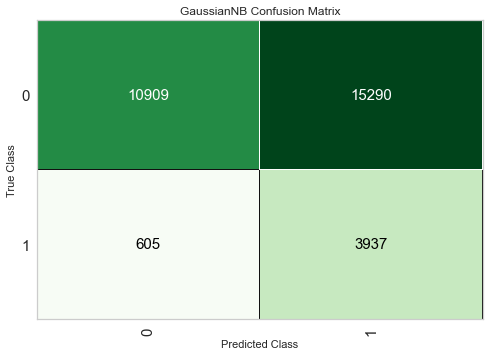

In [37]:
plot_model(nb, plot='confusion_matrix')

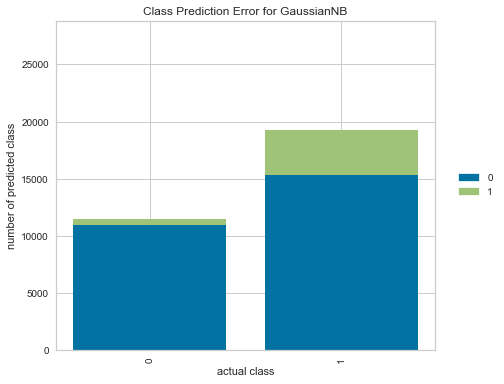

In [38]:
plot_model(nb, plot = 'error')

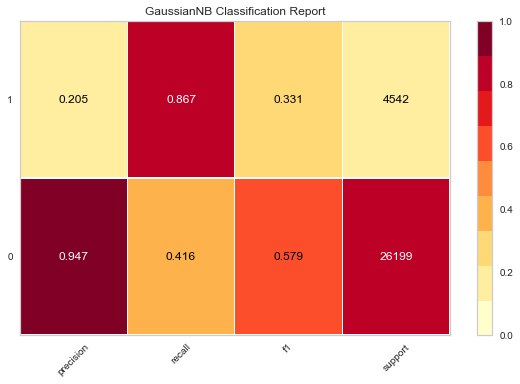

In [39]:
plot_model(nb, plot = 'class_report')

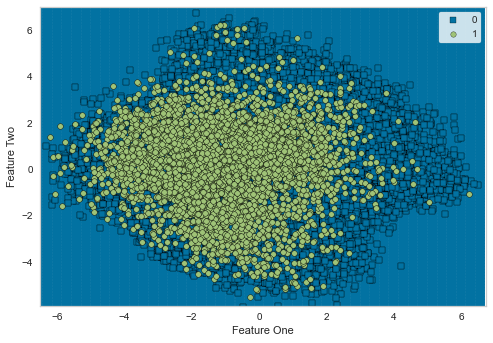

In [41]:
plot_model(nb, plot = 'boundary')

In [42]:
#plot_model(nb, plot='learning')

In [43]:
#plot_model(nb, plot = 'manifold')

In [44]:
#plot_model(nb, plot = 'calibration')

In [45]:
#plot_model(nb, plot = 'vc')

In [46]:
#plot_model(nb, plot='dimension')

In [48]:
#plot_model(nb, plot = 'feature')

In [49]:
plot_model(nb, plot = 'parameter')

,Parameters
priors,NaN
var_smoothing,1.000000e-09


## Tune Model

In [50]:
tuned_nb = tune_model(nb, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4670,0.6980,0.8500,0.1974,0.3204,0.1059,0.1849
1,0.4971,0.7094,0.8443,0.2064,0.3317,0.1235,0.2042
2,0.4878,0.7122,0.8377,0.2023,0.3259,0.1152,0.1929
3,0.4695,0.7036,0.8406,0.1968,0.3190,0.1045,0.1808
4,0.4946,0.7237,0.8321,0.2037,0.3273,0.1179,0.1946
5,0.4598,0.7086,0.8764,0.1988,0.3241,0.1096,0.1966
6,0.4976,0.7047,0.8189,0.2028,0.3251,0.1156,0.1886
7,0.4960,0.7159,0.8338,0.2043,0.3282,0.1193,0.1966
8,0.4915,0.7179,0.8385,0.2035,0.3275,0.1179,0.1962
9,0.4901,0.7155,0.8480,0.2044,0.3294,0.1199,0.2011


In [58]:
bagged_nb = ensemble_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5168,0.7348,0.8221,0.2095,0.3340,0.1295,0.2054
1,0.5076,0.7405,0.8335,0.2079,0.3328,0.1269,0.2053
2,0.5114,0.7208,0.8070,0.2053,0.3274,0.1208,0.1919
3,0.5192,0.7382,0.8269,0.2111,0.3363,0.1327,0.2101
4,0.5051,0.7266,0.8127,0.2040,0.3261,0.1184,0.1905
5,0.5266,0.7359,0.8110,0.2116,0.3357,0.1328,0.2062
6,0.5160,0.7409,0.8261,0.2100,0.3349,0.1303,0.2072
7,0.5113,0.7303,0.8108,0.2059,0.3284,0.1220,0.1942
8,0.5151,0.7323,0.8146,0.2078,0.3312,0.1259,0.1994
9,0.5145,0.7240,0.8108,0.2071,0.3299,0.1242,0.1967


In [51]:
boosted_nb = ensemble_model(nb, method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4744,0.5802,0.6217,0.1636,0.2590,0.0327,0.0505
1,0.6045,0.5373,0.3991,0.1613,0.2297,0.0243,0.0289
2,0.5564,0.4774,0.3594,0.1321,0.1932,-0.0292,-0.0362
3,0.3870,0.5340,0.7104,0.1555,0.2551,0.0167,0.0313
4,0.2146,0.4969,0.9236,0.1499,0.2579,0.0048,0.0189
5,0.3204,0.4577,0.6406,0.1313,0.2179,-0.0363,-0.0749
6,0.4645,0.5437,0.5915,0.1554,0.2461,0.0157,0.0243
7,0.5718,0.5848,0.5156,0.1759,0.2623,0.0540,0.0695
8,0.6845,0.4941,0.1671,0.1136,0.1353,-0.0492,-0.0506
9,0.8359,0.4687,0.0057,0.0462,0.0101,-0.0229,-0.0389


In [ ]:
calibrated_nb = calibrate_model(nb)

IntProgress(value=0, description='Processing: ', max=14)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:45:02
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 7 of 10
ETC,. . . . . . . . . . . . . . . . . .,25.2 Seconds Remaining


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5302,0.7347,0.8079,0.2124,0.3364,0.1343,0.2072
1,0.5200,0.7405,0.8231,0.2109,0.3357,0.1321,0.2085
2,0.5236,0.7209,0.7871,0.2068,0.3275,0.1227,0.1894
3,0.5352,0.7382,0.8098,0.2146,0.3393,0.1386,0.2123
4,0.5220,0.7265,0.7975,0.2077,0.3296,0.1250,0.1944
5,0.5358,0.7358,0.7902,0.2120,0.3343,0.1325,0.2009


# Predict models

In [56]:
predicted_nb = predict_model(nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5784,0.7391,0.8011,0.2314,0.3591,0.169,0.2419


In [57]:
predicted_nb_tuned = predict_model(tuned_nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5784,0.7391,0.8011,0.2314,0.3591,0.169,0.2419


In [61]:
predicted_nb_bagged = predict_model(bagged_nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.5633,0.7384,0.8087,0.2259,0.3531,0.1594,0.234


In [69]:
predicted_blended_top3 = predict_model(blended_top3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8048,0.762,0.4414,0.3656,0.4,0.2846,0.2864


# The golden moment... put 10% sample test data through the models...

# Recombine test_features, test_target at first train/test/split
 This "test" set was split BEFORE Oversampling. PyCaret takes the "train" from this split and splits it internally again. Since we have no control of how PyCaret does this we needed to do a train/test split before we input the training set into PyCaret. Now we will recombine the test_features and test_target into one new df

In [51]:
test_features.shape

(26633, 32)

In [52]:
test_target.shape

(26633,)

In [53]:
test_df = test_features.copy()

In [54]:
test_df['zeroBalCode'] = test_target

In [55]:
test_df.shape

(26633, 33)

In [56]:
totalTestCount = test_df.zeroBalCode.value_counts().sum()
posTestCount = test_df.zeroBalCode.value_counts()[1]
print('#############################################')
print('This "Test" set has not been oversamplied')
print(test_df.zeroBalCode.value_counts())
print(f'Positive samples are {round(posTestCount/totalTestCount*100,2)}%')

#############################################
This "Test" set has not been oversamplied
0    22708
1     3925
Name: zeroBalCode, dtype: int64
Positive samples are 14.74%


## Create Confusion Matrix output functions

In [57]:
def calc_confusion(row):
    if ((row['zeroBalCode'] == 0) & (row['Label'] == 0)):
        value = 'TrueNegative'
    elif ((row['zeroBalCode'] == 0) & (row['Label'] == 1)):
        value = 'FalsePositive'
    elif ((row['zeroBalCode'] == 1) & (row['Label'] == 1)):
        value = 'TruePositive'
    elif ((row['zeroBalCode'] == 1) & (row['Label'] == 0)):
        value = 'FalseNegative'
    else:
        value = 'Undefined'
    return value

In [58]:
def cM(df):
    print(f'           ##############################')
    print(f'           #             #              #')
    print(f'         0 #    {df["TrueNegative"]}     #     {df["FalsePositive"]}      #')
    print(f'  True     #             #              #')
    print(f'  Class    ##############################')
    print(f'           #             #              #')
    print(f'         1 #    {df["FalseNegative"]}      #     {df["TruePositive"]}      #')
    print(f'           #             #              #')
    print(f'           ##############################')
    print(f'                  0              1        ')
    print(f'                  Predicted Class           ')


In [59]:
def cMCalc():
    # 0 or 2 = Predict equals truth, 1 = Predict doesn't equal truth
    totalNegative = confusionMatrix['TrueNegative'] + confusionMatrix['FalseNegative']
    totalPositive = confusionMatrix['TruePositive'] + confusionMatrix['FalsePositive']
    total = totalNegative + totalPositive
    trueNegativePct = confusionMatrix['TrueNegative'] / total * 100
    falseNegativePct = confusionMatrix['FalseNegative'] / total * 100
    truePositivePct = confusionMatrix['TruePositive'] / total * 100
    falsePositivePct = confusionMatrix['FalsePositive'] / total * 100

    # Accuracy Calculation
    accuracy = (confusionMatrix['TruePositive'] + confusionMatrix['TrueNegative'])/(totalPositive + totalNegative)
    # Recall Calculation
    recall = (confusionMatrix['TruePositive']/(confusionMatrix['TruePositive'] + confusionMatrix['FalseNegative']))
    # Precision Calculation
    precision = (confusionMatrix['TruePositive']/(confusionMatrix['TruePositive'] + confusionMatrix['FalsePositive']))

    print(f'TrueNegative:  {round(trueNegativePct,2)}%')
    print(f'FalseNegative:  {round(falseNegativePct,2)}%')
    print(f'TruePositive:   {round(truePositivePct,2)}%')
    print(f'FalsePositive: {round(falsePositivePct,2)}%')
    print(f'#####################################################')
    print(f'Accuracy: {round(accuracy,2)*100}%   Recall: {round(recall,2)*100}%   Precision: {round(precision,2)*100}%')
    print(f'#####################################################')

# Evaluate Models

# Naive Bayes Classifier

In [176]:
tuned_nb = tune_model(nb, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5997,0.7389,0.7566,0.2352,0.3589,0.1718,0.2340
1,0.6060,0.7492,0.7820,0.2424,0.3701,0.1862,0.2541
2,0.6023,0.7402,0.7528,0.2358,0.3592,0.1726,0.2340
3,0.6005,0.7358,0.7669,0.2373,0.3624,0.1761,0.2407
4,0.6115,0.7472,0.7792,0.2449,0.3726,0.1902,0.2573
5,0.6024,0.7501,0.7843,0.2410,0.3686,0.1839,0.2524
6,0.6004,0.7389,0.7613,0.2363,0.3607,0.1740,0.2373
7,0.5954,0.7393,0.7646,0.2344,0.3588,0.1709,0.2350
8,0.6072,0.7410,0.7646,0.2403,0.3656,0.1811,0.2451
9,0.6102,0.7556,0.7877,0.2455,0.3744,0.1919,0.2610


In [177]:
calibrated_nb = calibrate_model(tuned_nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6232,0.7390,0.7345,0.2437,0.3660,0.1847,0.2418
1,0.6307,0.7493,0.7613,0.2523,0.3790,0.2014,0.2638
2,0.6291,0.7403,0.7387,0.2477,0.3710,0.1917,0.2494
3,0.6239,0.7358,0.7448,0.2458,0.3697,0.1892,0.2483
4,0.6353,0.7473,0.7556,0.2540,0.3802,0.2038,0.2647
5,0.6265,0.7501,0.7569,0.2492,0.3749,0.1959,0.2575
6,0.6260,0.7389,0.7392,0.2460,0.3692,0.1890,0.2469
7,0.6227,0.7393,0.7382,0.2440,0.3668,0.1856,0.2434
8,0.6316,0.7410,0.7425,0.2498,0.3738,0.1955,0.2539
9,0.6344,0.7556,0.7637,0.2548,0.3821,0.2058,0.2685


In [140]:
#optimize threshold for trained model
optimize_threshold(tuned_nb, true_negative = 1000, false_negative = -5000)

Optimized Probability Threshold: 0.88 | Optimized Cost Function: 22153000


In [166]:
final_nb = finalize_model(tuned_nb)

In [167]:
predictions = predict_model(final_nb, data=test_df)

In [168]:
pd.set_option('max_columns',None)
predictions.head()

,Unnamed: 0.1,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,loanAge,mSA,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth,zeroBalCode,Label,Score
0,1362689,C,"JPMORGAN CHASE BANK, NA",6.000,42000,360,68,68,1,30,C,MO,656,0.0,0,698,698,698,99,44180,6.03,5.83,5.9325,0.034305,-0.030,-0.170,0.0675,-0.004975,-0.029160,0.011378,2003,11,1,1,0.6684
1,1450254,R,OTHER,5.375,63000,180,79,79,2,43,C,LA,703,0.0,0,665,636,650,100,12940,5.72,5.58,5.6350,0.025090,-0.345,0.205,-0.2600,-0.060315,0.036738,-0.046140,2004,2,0,1,0.5075
2,2306435,C,"BANK OF AMERICA, N.A.",5.000,256000,360,48,48,2,40,R,KY,410,0.0,0,771,769,770,95,17140,5.53,5.10,5.2860,0.084314,-0.530,0.100,-0.2860,-0.095841,0.019608,-0.054105,2008,12,0,0,0.0146
3,64951,B,OTHER,7.875,107000,240,80,80,2,28,P,CO,809,0.0,0,698,657,677,66,17820,8.12,7.96,8.0275,0.020101,-0.245,0.085,-0.1525,-0.030172,0.010678,-0.018997,2000,8,0,0,0.0476
4,1237528,B,"FLAGSTAR BANK, FSB",5.875,210000,240,71,71,1,49,C,NY,115,0.0,0,604,604,604,138,35620,6.34,6.14,6.2640,0.032573,-0.465,0.265,-0.3890,-0.073344,0.043160,-0.062101,2003,8,0,1,0.6378


In [169]:
results = predictions[['zeroBalCode','Label','Score']]

In [170]:
predictions.Label.value_counts()

0    17594
1     9039
Name: Label, dtype: int64

In [171]:
results['Confusion'] = results.apply(calc_confusion, axis=1)

In [172]:
confusionMatrix = results.Confusion.value_counts().to_dict()

In [173]:
cM(confusionMatrix)

           ##############################
           #             #              #
         0 #    16256     #     6452      #
  True     #             #              #
  Class    ##############################
           #             #              #
         1 #    1338      #     2587      #
           #             #              #
           ##############################
                  0              1        
                  Predicted Class           


In [174]:
cMCalc()

TrueNegative:  61.04%
FalseNegative:  5.02%
TruePositive:   9.71%
FalsePositive: 24.23%
#####################################################
Accuracy: 71.0%   Recall: 66.0%   Precision: 28.999999999999996%
#####################################################


In [175]:
pred_holdout = predict_model(final_nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6269,0.7423,0.7649,0.2508,0.3778,0.1992,0.2625


In [179]:
save_model(tuned_nb, 'np.tuned10pct_091920')

Transformation Pipeline and Model Succesfully Saved


In [137]:
#save_model(calibrated_et, 'extraTreesCalibrated2.5OS5050_082220')